In [322]:
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Import from Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split

import scipy.stats as stat
import pylab

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
# Dataset view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [323]:
df = pd.read_csv('body_level_classification_train.csv')


In [324]:
df.sample(5)

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
811,Female,37.441044,1.524293,76.202761,yes,2.000000,1.603549,Sometimes,no,2.994046,Sometimes,yes,no,1.335857,0.000000,Automobile,Body Level 4
1234,Male,23.000000,1.650000,95.000000,yes,2.000000,2.000000,Frequently,no,3.000000,Always,yes,no,0.000000,1.000000,Automobile,Body Level 4
1048,Female,18.166318,1.649553,82.323954,yes,2.864776,1.876915,no,no,3.000000,Sometimes,yes,no,0.631565,0.186414,Public_Transportation,Body Level 4
552,Male,20.986834,1.677178,80.379575,yes,2.000000,2.000000,no,no,2.961706,Sometimes,yes,no,1.661556,1.114716,Public_Transportation,Body Level 3
268,Female,22.000000,1.560000,49.000000,yes,2.000000,1.000000,no,no,3.000000,Sometimes,no,yes,2.000000,0.000000,Walking,Body Level 2


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

In [237]:
df.shape

(1477, 17)

In [238]:
df.describe()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,24.290420,1.701602,86.542290,2.421912,2.005120,2.682104,1.023106,0.650672
std,6.323081,0.094654,26.278277,0.540711,0.620307,0.790751,0.844840,0.605199
min,15.000000,1.456346,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.895877,1.629194,65.000000,2.000000,1.549931,2.644692,0.145687,0.000000
50%,22.720449,1.701284,82.636162,2.416044,2.000000,3.000000,1.000000,0.616045
75%,26.000000,1.770278,106.690530,3.000000,2.482933,3.000000,1.672639,1.000000
max,55.246250,1.980000,173.000000,3.000000,3.000000,4.000000,3.000000,2.000000


In [326]:
df.duplicated().sum()

14

In [327]:
df[df.duplicated()]

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
119,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
148,Female,21.0,1.52,42.0,no,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
176,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
184,Female,21.0,1.52,42.0,yes,3.0,1.0,Sometimes,no,1.0,Frequently,no,no,0.0,0.0,Public_Transportation,Body Level 1
301,Female,22.0,1.69,65.0,yes,2.0,2.0,Sometimes,no,3.0,Sometimes,yes,no,1.0,1.0,Public_Transportation,Body Level 2
302,Female,18.0,1.62,55.0,yes,2.0,1.0,no,no,3.0,Frequently,yes,no,1.0,1.0,Public_Transportation,Body Level 2
417,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
429,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
438,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3
461,Male,21.0,1.62,70.0,yes,2.0,3.0,Sometimes,no,1.0,no,no,no,1.0,0.0,Public_Transportation,Body Level 3


In [328]:
df=df.drop_duplicates()

In [329]:
df.duplicated().sum()

0

In [281]:
df[df.duplicated()]

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level


In [282]:
df.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [283]:
for col in df.select_dtypes(include='object') :
    print(col)
    print(df.groupby(col)['Body_Level'].value_counts(normalize=True)*100)
    print('---------------------------')

Gender
Gender  Body_Level  
Female  Body Level 4    45.517241
        Body Level 3    24.000000
        Body Level 1    16.551724
        Body Level 2    13.931034
Male    Body Level 4    47.425474
        Body Level 3    30.352304
        Body Level 2    13.279133
        Body Level 1     8.943089
Name: Body_Level, dtype: float64
---------------------------
H_Cal_Consump
H_Cal_Consump  Body_Level  
no             Body Level 3    39.411765
               Body Level 2    35.882353
               Body Level 1    18.235294
               Body Level 4     6.470588
yes            Body Level 4    51.740139
               Body Level 3    25.599381
               Body Level 1    11.987626
               Body Level 2    10.672854
Name: Body_Level, dtype: float64
---------------------------
Alcohol_Consump
Alcohol_Consump  Body_Level  
Always           Body Level 2    100.000000
Frequently       Body Level 3     48.979592
                 Body Level 4     26.530612
                 Body Level 2 

In [331]:
df=pd.get_dummies(df)


In [346]:
df.sample(5)

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,H_Cal_Consump_no,H_Cal_Consump_yes,Alcohol_Consump_Always,Alcohol_Consump_Frequently,Alcohol_Consump_Sometimes,Alcohol_Consump_no,Smoking_no,Smoking_yes,Food_Between_Meals_Always,Food_Between_Meals_Frequently,Food_Between_Meals_Sometimes,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
1020,30.605225,1.750000,120.000000,2.758394,2.174248,3.000000,1.079524,1.358163,4,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0
66,23.000000,1.882779,64.106108,3.000000,2.843777,3.000000,1.488843,0.009254,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0
16,19.948140,1.530884,39.371523,1.522001,1.981260,3.000000,2.306844,0.720454,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0
736,18.000000,1.742819,86.565148,3.000000,2.000000,3.000000,2.040816,0.860321,3,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
707,21.000000,1.612556,69.463458,2.000000,3.000000,1.259628,1.000000,0.000000,3,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0


In [349]:
df.columns

Index(['Age', 'Height', 'Weight', 'Veg_Consump', 'Water_Consump', 'Meal_Count',
       'Phys_Act', 'Time_E_Dev', 'Body_Level', 'Gender_Female', 'Gender_Male',
       'H_Cal_Consump_no', 'H_Cal_Consump_yes', 'Alcohol_Consump_Always',
       'Alcohol_Consump_Frequently', 'Alcohol_Consump_Sometimes',
       'Alcohol_Consump_no', 'Smoking_no', 'Smoking_yes',
       'Food_Between_Meals_Always', 'Food_Between_Meals_Frequently',
       'Food_Between_Meals_Sometimes', 'Food_Between_Meals_no', 'Fam_Hist_no',
       'Fam_Hist_yes', 'H_Cal_Burn_no', 'H_Cal_Burn_yes',
       'Transport_Automobile', 'Transport_Bike', 'Transport_Motorbike',
       'Transport_Public_Transportation', 'Transport_Walking'],
      dtype='object')

In [350]:
X=df.iloc[:,:].copy()
Y=df.iloc[:,8:9].copy()

X=X.drop(["Body_Level"],axis=1)
Y.columns


Index(['Body_Level'], dtype='object')

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [352]:
X_train.shape

(1170, 31)

In [353]:
y_train.shape

(1170, 1)

In [354]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
svc=SVC()

svc.fit(X_train,y_train)

SVC()

In [355]:
y_predict=svc.predict(X_train)
r2_score(y_predict,y_train)
# multioutput.score(y_predict,y_train)

0.7820057559300004

In [356]:
y_predict=svc.predict(X_test)
r2_score(y_predict,y_test)

0.745642952902134

In [295]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import r2_score
svc=SVC()
multioutput=MultiOutputClassifier(svc)
multioutput.fit(X_train,y_train)


MultiOutputClassifier(estimator=SVC())

In [296]:
y_predict=multioutput.predict(X_train)
r2_score(y_predict,y_train)
# multioutput.score(y_predict,y_train)

-0.2491369854113256

In [271]:
y_predict=multioutput.predict(X_test)
r2_score(y_predict,y_test)

-0.2619174049703499

In [330]:
print(df['Body_Level'][:10])
numeric_var = {"Body_Level": {"Body Level 4":4, "Body Level 3":3, "Body Level 2":2, "Body Level 1":1}}
df = df.replace(numeric_var)
print(df['Body_Level'][:10])

0    Body Level 1
1    Body Level 1
2    Body Level 1
3    Body Level 1
4    Body Level 1
5    Body Level 1
6    Body Level 1
7    Body Level 1
8    Body Level 1
9    Body Level 1
Name: Body_Level, dtype: object
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Body_Level, dtype: int64


In [272]:
df['H_Cal_Consump'][:10]

KeyError: 'H_Cal_Consump'

In [285]:
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(df.H_Cal_Consump)


In [286]:
df['H_Cal_Consump'] = y

In [287]:
df['H_Cal_Consump'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: H_Cal_Consump, dtype: int32

In [288]:
print(df['Gender'][:10])
y = LabelBinarizer().fit_transform(df.Gender)
df['Gender'] = y
print(df['Gender'][:10])

0    Female
1      Male
2    Female
3    Female
4      Male
5      Male
6      Male
7    Female
8    Female
9    Female
Name: Gender, dtype: object
0    0
1    1
2    0
3    0
4    1
5    1
6    1
7    0
8    0
9    0
Name: Gender, dtype: int32


In [289]:
print(df['Alcohol_Consump'][:10])
numeric_var = {"Alcohol_Consump": {"Always":4, "Frequently":3, "Sometimes":2, "no":1}}
df = df.replace(numeric_var)
print(df['Alcohol_Consump'][:10])


0           no
1    Sometimes
2    Sometimes
3    Sometimes
4           no
5           no
6    Sometimes
7           no
8           no
9    Sometimes
Name: Alcohol_Consump, dtype: object
0    1
1    2
2    2
3    2
4    1
5    1
6    2
7    1
8    1
9    2
Name: Alcohol_Consump, dtype: int64


In [290]:
print(df['Smoking'][:10])
y = LabelBinarizer().fit_transform(df.Smoking)
df['Smoking'] = y
print(df['Smoking'][:10])

0     no
1     no
2     no
3     no
4     no
5     no
6     no
7     no
8     no
9    yes
Name: Smoking, dtype: object
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Smoking, dtype: int32


In [ ]:
df=pd.get_dummies(df, columns = ['Food_Between_Meals'])


In [291]:
print(df['Food_Between_Meals'][:10])
numeric_var = {"Food_Between_Meals": {"Always":4, "Frequently":3, "Sometimes":2, "no":1}}
df = df.replace(numeric_var)
print(df['Food_Between_Meals'][:10])

0    Frequently
1     Sometimes
2     Sometimes
3     Sometimes
4     Sometimes
5     Sometimes
6     Sometimes
7    Frequently
8    Frequently
9     Sometimes
Name: Food_Between_Meals, dtype: object
0    3
1    2
2    2
3    2
4    2
5    2
6    2
7    3
8    3
9    2
Name: Food_Between_Meals, dtype: int64


In [292]:
print(df['Fam_Hist'][:10])
y = LabelBinarizer().fit_transform(df.Fam_Hist)
df['Fam_Hist'] = y
print(df['Fam_Hist'][:10])


0    yes
1    yes
2     no
3     no
4    yes
5    yes
6    yes
7    yes
8     no
9     no
Name: Fam_Hist, dtype: object
0    1
1    1
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Fam_Hist, dtype: int32


In [293]:
print(df['H_Cal_Burn'][:10])
y = LabelBinarizer().fit_transform(df.H_Cal_Burn)
df['H_Cal_Burn'] = y
print(df['H_Cal_Burn'][:10])



0    no
1    no
2    no
3    no
4    no
5    no
6    no
7    no
8    no
9    no
Name: H_Cal_Burn, dtype: object
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: H_Cal_Burn, dtype: int32


In [294]:
print(df['Transport'][:10])
df=pd.get_dummies(df, columns = ['Transport'])
df.sample()



0    Public_Transportation
1    Public_Transportation
2    Public_Transportation
3    Public_Transportation
4               Automobile
5               Automobile
6    Public_Transportation
7    Public_Transportation
8    Public_Transportation
9               Automobile
Name: Transport, dtype: object


,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Body_Level,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
256,0,21.0,1.72,66.5,1,3.0,3.0,1,0,4.0,4,1,0,0.0,2.0,2,0,0,0,1,0


In [ ]:
def plots_helper(column): # calculating the IQR to detrmine the exact number of outliers in each feature and skewness
    Q3 = np.quantile(column, 0.75)
    Q1 = np.quantile(column, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    oc = len(column[column>upper_range]) + len(column[column<lower_range])
    percent = round((oc/len(column))*100,2)
    sk = round(stat.skew(column),2)
    return oc , percent , sk

In [ ]:
def box_dist_prob_plots(df): # BoxPlot , Distribution, Histogram and ProbabilityPlot
    number_features = len(df.columns)
    
    plt.figure(figsize = (25,number_features*6))
    for column,i in zip(df,range(1,number_features*3+1,3)):
        
        # coalculating the outliers and its percentage
            
        oc , percent , sk = plots_helper(df[column])

        # plotting the 3 diagrams for each feature
        plt.subplot(number_features, 3, i)
        sns.boxplot(df[column])
        plt.xlabel(column, size=14)
        plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
        
        plt.subplot(number_features, 3, i+1)
        sns.distplot(df[column],kde=False)
        plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
        plt.xlabel(column, size=14)
        plt.ylabel("Count", size=14)
        plt.axvline(x=df[column].median(),ls='--')
        plt.axvline(x=df[column].mean())
        plt.legend(['mean', 'median'])
        
        plt.subplot(number_features, 3, i+2)
        stat.probplot(df[column],dist='norm',plot=pylab,rvalue=True)
        

In [ ]:
def box_for_one_col(column,name):
    oc , percent , sk = plots_helper(column)

    # plotting the 3 diagrams for each feature
    plt.subplot(1, 3, 1)
    sns.boxplot(column)
    plt.xlabel(name, size=14)
    plt.title(f'Number of outliers {oc} ({percent}%)', fontsize=12, color ='red', fontweight = 'bold')
    
    plt.subplot(1, 3, 2)
    sns.distplot(column,kde=False)
    plt.title(f'Skewness = {sk}', fontsize=12, color ='red', fontweight = 'bold')
    plt.xlabel(name, size=14)
    plt.ylabel("Count", size=14)
    plt.axvline(x=column.median(),ls='--')
    plt.axvline(x=column.mean())
    plt.legend(['mean', 'median'])
    
    plt.subplot(1, 3, 3)
    stat.probplot(column,dist='norm',plot=pylab,rvalue=True)

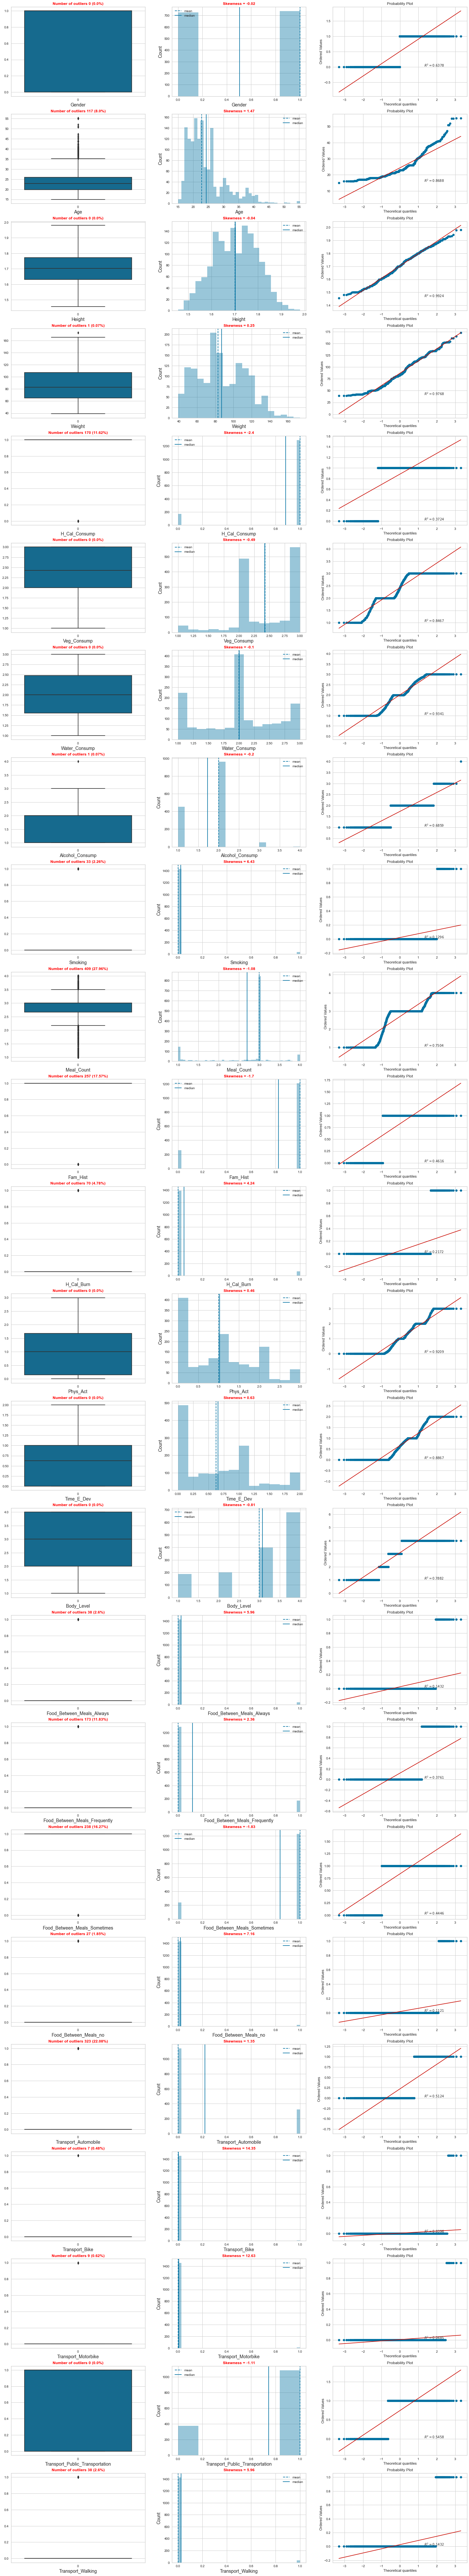

In [ ]:
box_dist_prob_plots(df)

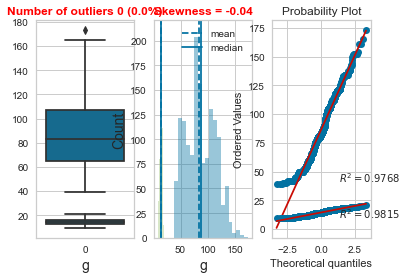

In [ ]:
# work for outliers
box_for_one_col(df["Weight"],"g")
df["Weight"],_ = stat.yeojohnson(df["Weight"])
box_for_one_col(df["Weight"],"g")

In [ ]:
df['Age'].unique()


array([22.547298, 19.799054, 17.823438, 19.007177, 19.72925 , 18.470562,
       18.      , 29.970445, 23.444286, 20.      , 18.48207 , 20.255616,
       18.019572, 16.928791, 17.      , 19.94814 , 21.      , 17.082867,
       20.552695, 18.381382, 17.469417, 25.380557, 22.176922, 24.163526,
       19.      , 21.084625, 21.125098, 19.052833, 16.30687 , 21.376426,
       18.094079, 21.310907, 19.994543, 19.091346, 20.242237, 21.708354,
       19.833682, 19.639431, 22.717943, 21.274628, 17.210933, 22.998709,
       20.400053, 21.478496, 18.024853, 18.281092, 21.81119 , 22.033129,
       21.287999, 21.491055, 19.300435, 18.216032, 18.874591, 27.14823 ,
       18.274358, 19.735968, 23.      , 20.406066, 18.038422, 20.744839,
       19.071027, 17.065445, 18.766033, 18.006742, 22.99368 , 19.029494,
       18.871794, 18.53084 , 22.422674, 16.198153, 19.434709, 20.954955,
       20.225396, 20.172661, 22.209706, 18.164768, 17.521754, 22.377998,
       17.671064, 17.080493, 18.656912, 19.504696, 

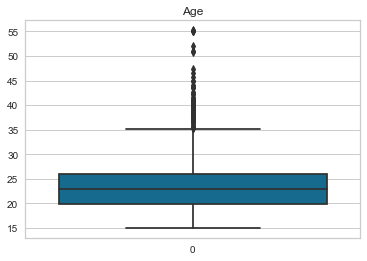

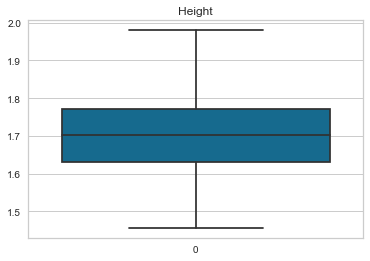

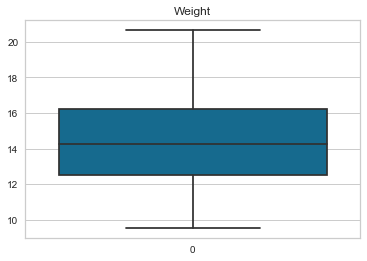

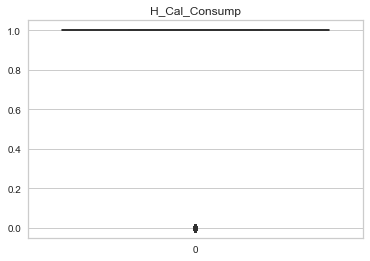

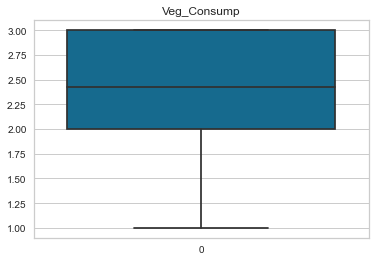

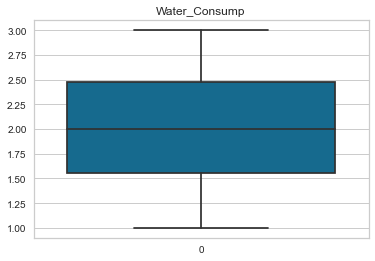

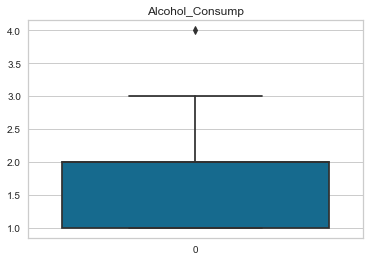

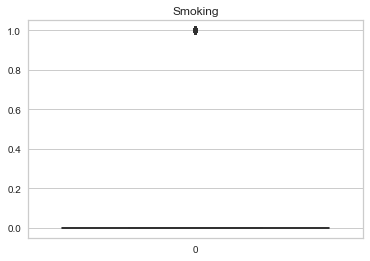

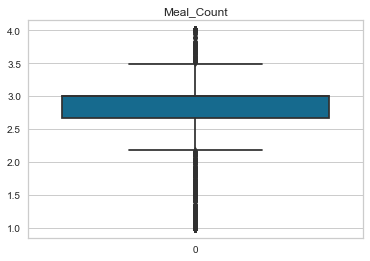

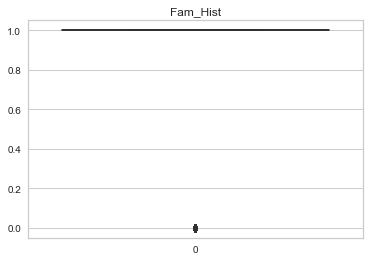

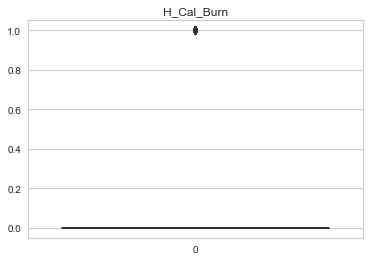

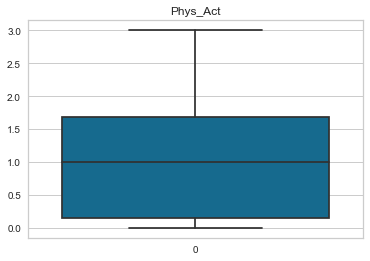

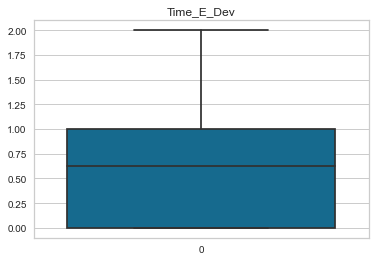

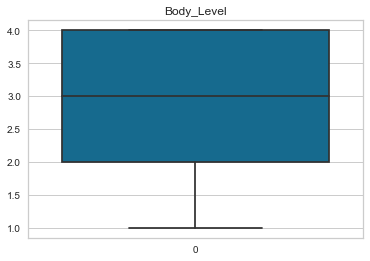

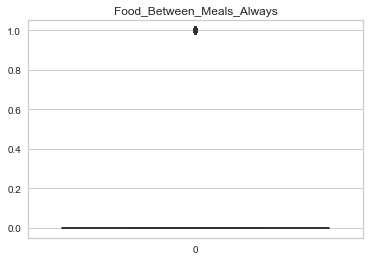

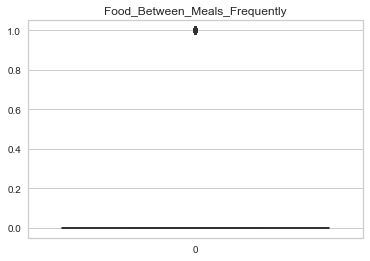

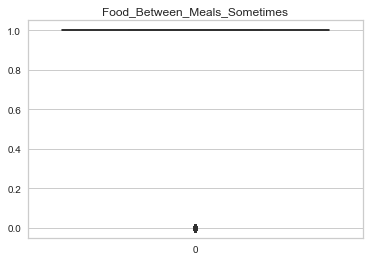

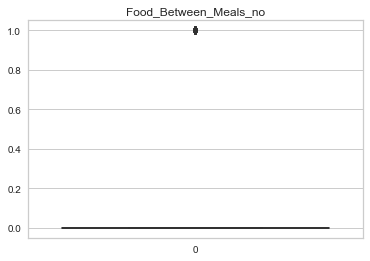

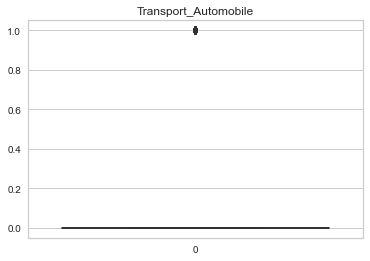

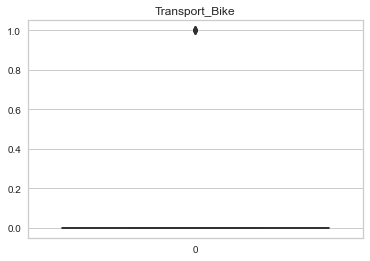

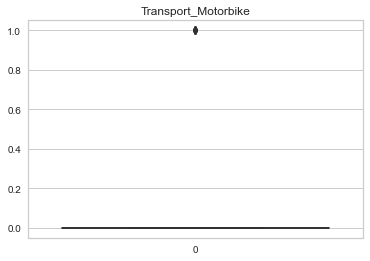

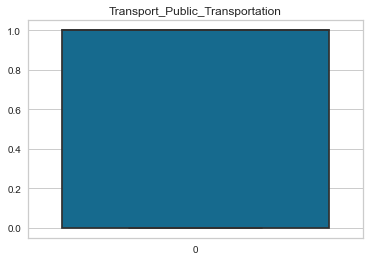

In [ ]:
for col in list(df.columns.values)[1:-1]:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# make age int 
df['Age'] = df['Age'].fillna(0).astype(int)